In [1]:

%load_ext autoreload

In [2]:
import pandas as pd
from IPython.display import display

from graphing import *
import numpy as np
from matplotlib import pyplot as plt

import re

%autoreload


In [ ]:
TnT_Baseline = {1:(91.5, 10.86), 4:(90.7, 43.98), 7:(90.6, 77.09)}


In [3]:
def shiftTimeStamp(row):
    return row['timeStamp'] - 1688695066761

df = pd.read_csv('logs/day1.csv')
renaming={
    "Token Request": "Token_Request",
    "RTSA_Details_25th": "RTSA_Details_20th",
    "RTSA_EDD_40th": "RTSA-EDD_40th",
    "RTSA_EDD_20th": "RTSA-EDD_20Th",
    "RTSA_EDD_20Th": "RTSA-EDD_20Th",
    "RTSA_EDD_Base": "RTSA-EDD_Base"
}
df = df.replace(renaming)
#df['modTimeStamp'] = df.apply(shiftTimeStamp, axis=1)
tests = Test(df, 60)
tests.unit_tests_dict.pop("Token_Request")
tests.unit_tests_dict.pop("Token_TnT")

c:\Users\jakparker\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
tests.unique_labels

array(['Token_TnT', 'Token_Request', 'TnT_Base', 'RTSA-EDD_Base',
       'RTSA_Details_Base', 'WG_Base', 'SalesOrder_Base', 'QSL_Base',
       'RTSA_Details_20th', 'RTSA-EDD_20th', 'RTSA_Details_40th',
       'RTSA-EDD_40th', 'TnT_4Th', 'TnT_7Th', 'RTSA-EDD_20Th',
       'RTSA_Details_20Th'], dtype=object)

In [6]:
tests.get_categories()

{'QSL', 'RTSA', 'RTSA-EDD', 'SalesOrder', 'TnT', 'WG'}

In [1]:
%autoreload


UsageError: Line magic function `%autoreload` not found.


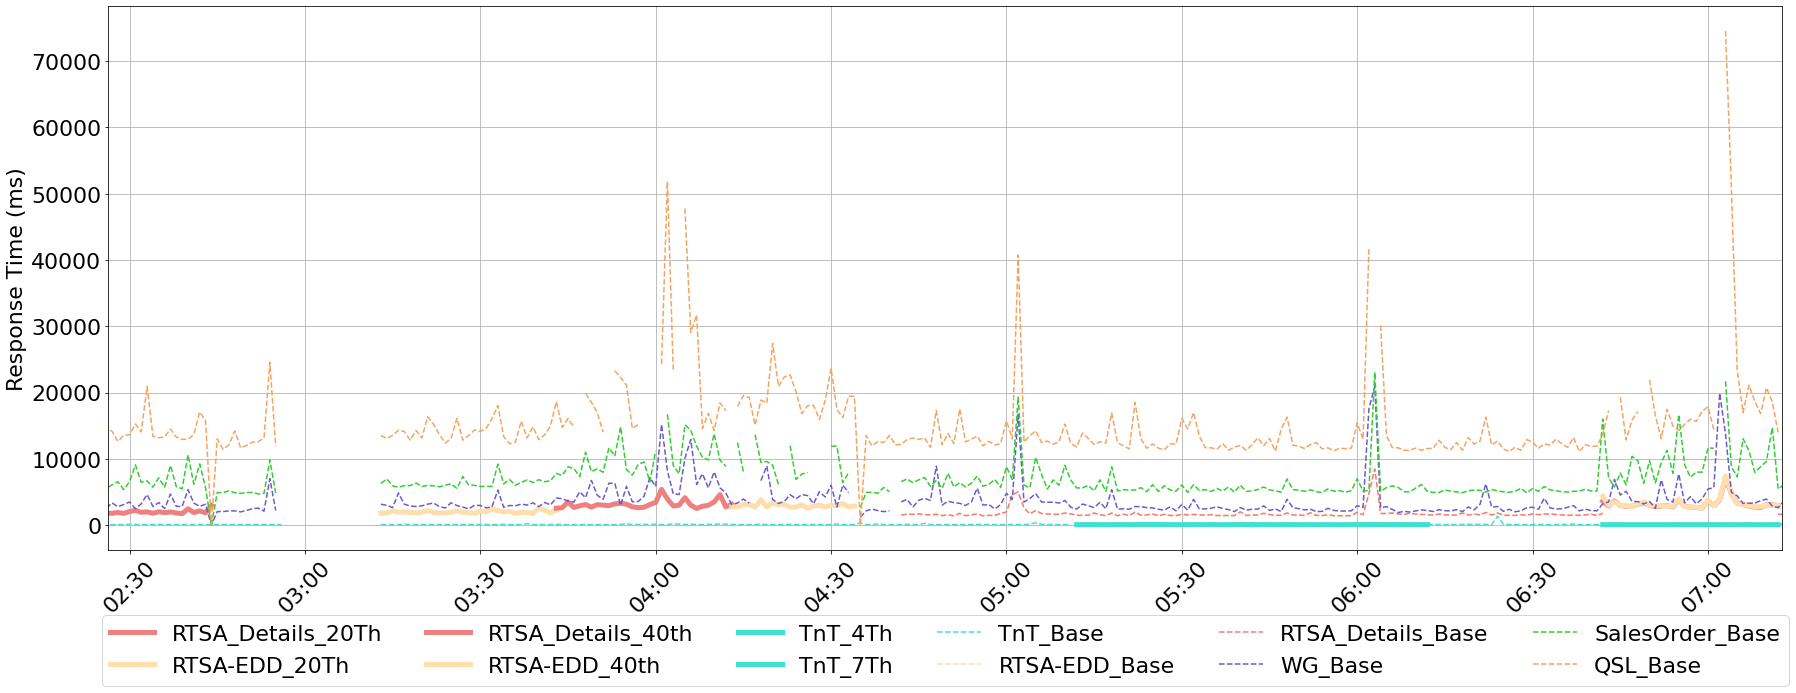

In [69]:
#for ut in tests.unit_tests:
#    ut.line_app.color = "red"

tests.reset_line_apps()

cat_color_dict = {
    "RTSA": "lightcoral",
    "QSL": "sandybrown",
    "RTSA-EDD": "navajowhite",
    "SalesOrder": "limegreen",
    "TnT": "turquoise",
    "WG": "slateblue"
}

tests.assign_color_by_category(cat_color_dict)

tests.time_series_categories_against_base(tests.get_categories())

In [14]:
sch = pd.read_csv('logs/day1_sch.csv')
sch_int = sch['INTERFACE_CODE'].unique()
sch.head()

,INTERFACE_CODE,INTERFACE_RUN_ID,Start,End,Elapsed
0,TPG-R2-L008A,3265518,17:54:48,19/JUL/23 05:56:07.000000000 PM,19
1,TPG-R2-L008-SCH,3265493,17:53:03,19/JUL/23 05:53:53.000000000 PM,50
2,TPG-R2-L010-SCH,3265468,17:50:03,19/JUL/23 05:50:03.000000000 PM,0
3,TPG-R2-L002-SCH,3265454,17:48:35,19/JUL/23 05:48:51.000000000 PM,16
4,TPG-R2-L008A,3265430,17:44:50,19/JUL/23 05:46:05.000000000 PM,15


In [17]:
##L008
sch['Time']= pd.to_datetime(sch['End'])
L008_SCH = sch[sch['INTERFACE_CODE']=='TPG-R2-L008-SCH']
L008A = sch[sch['INTERFACE_CODE']=='TPG-R2-L008A']
L010_SCH = sch[sch['INTERFACE_CODE']=='TPG-R2-L010-SCH']
L002_SCH = sch[sch['INTERFACE_CODE']=='TPG-R2-L002-SCH']



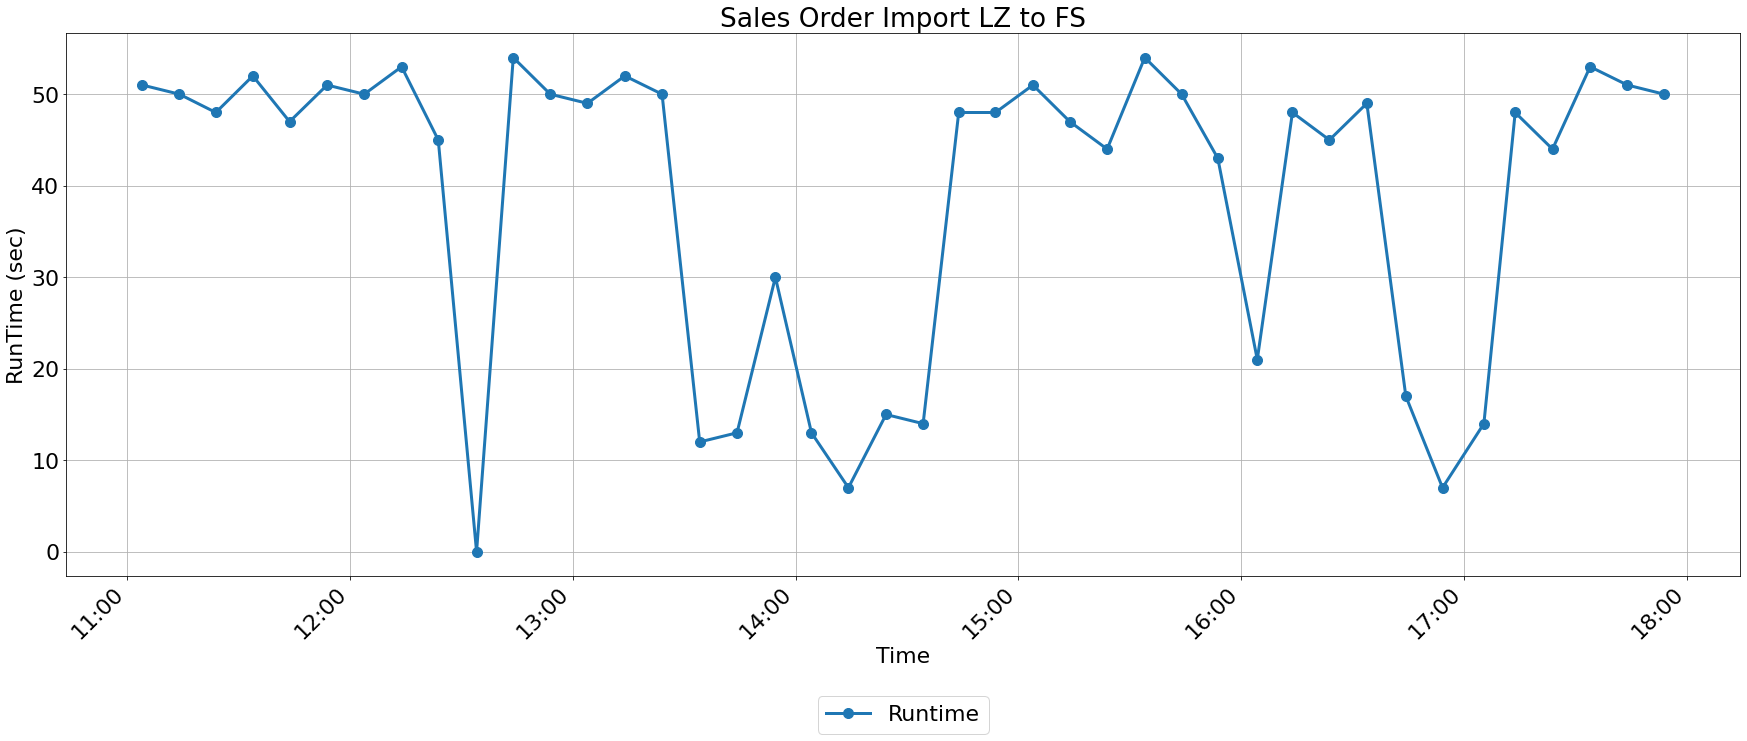

In [18]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(L008_SCH['Time'], L008_SCH['Elapsed'], label='Runtime', lw=3, marker='o', markersize=10)

#ax.plot(L008A['Time'], L008A['Elapsed'], label='Outbound Order Reference', lw=3, marker='o', markersize=10)

ax.set_xlabel('Time')
ax.set_ylabel('RunTime (sec)')
ax.set_title('Sales Order Import LZ to FS')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
# Add a legend
ax.legend(
            loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2
        )
plt.grid()
# Rotate and align the x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

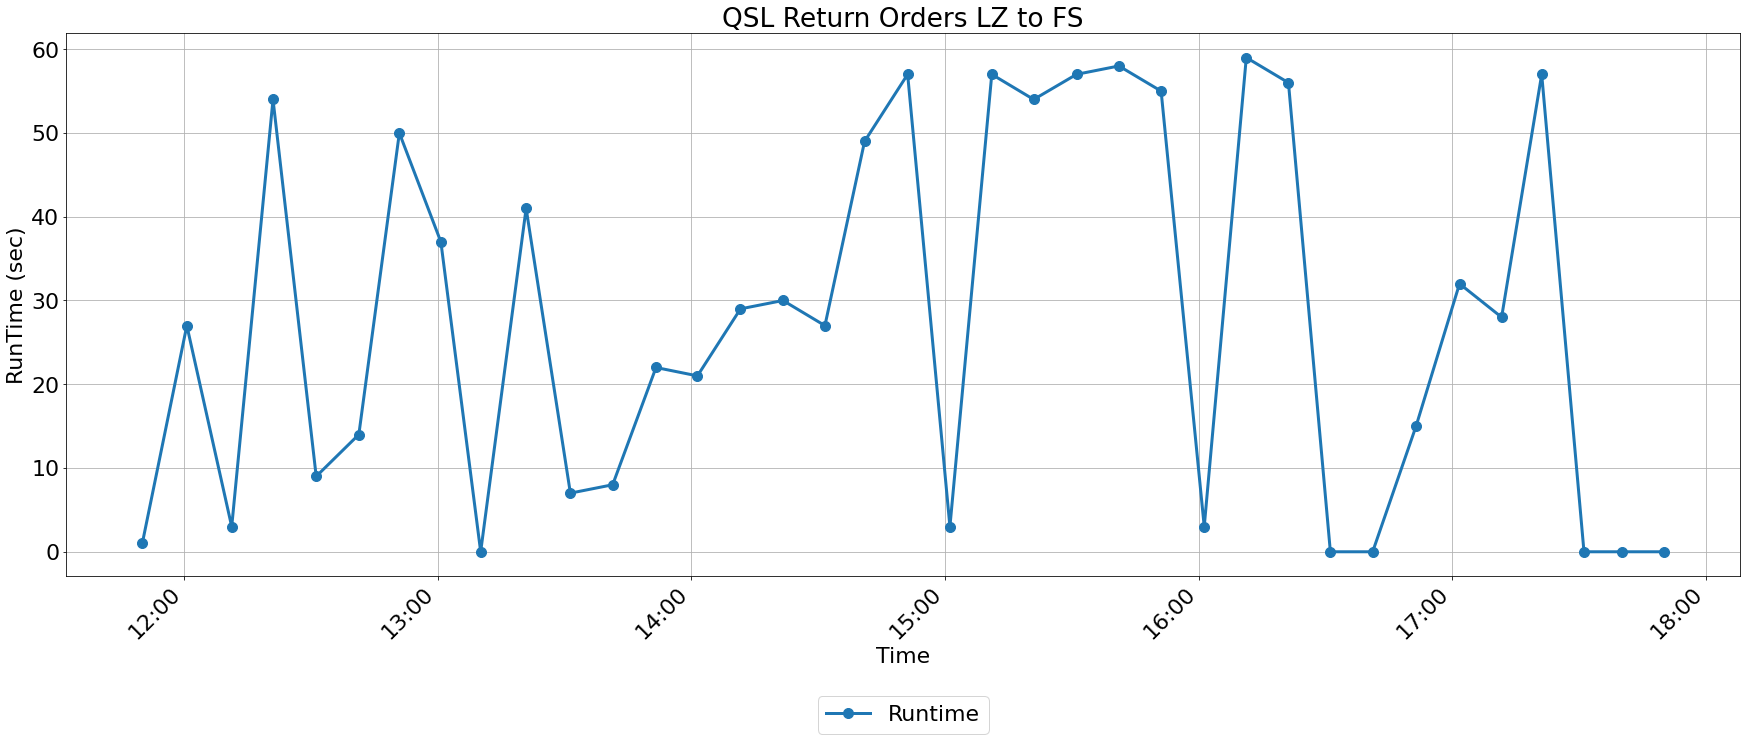

In [21]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(L010_SCH['Time'], L010_SCH['Elapsed'], label='Runtime', lw=3, marker='o', markersize=10)

#ax.plot(L008A['Time'], L008A['Elapsed'], label='Outbound Order Reference', lw=3, marker='o', markersize=10)

ax.set_xlabel('Time')
ax.set_ylabel('RunTime (sec)')
ax.set_title('QSL Return Orders LZ to FS')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
# Add a legend
ax.legend(
            loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2
        )
plt.grid()
# Rotate and align the x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

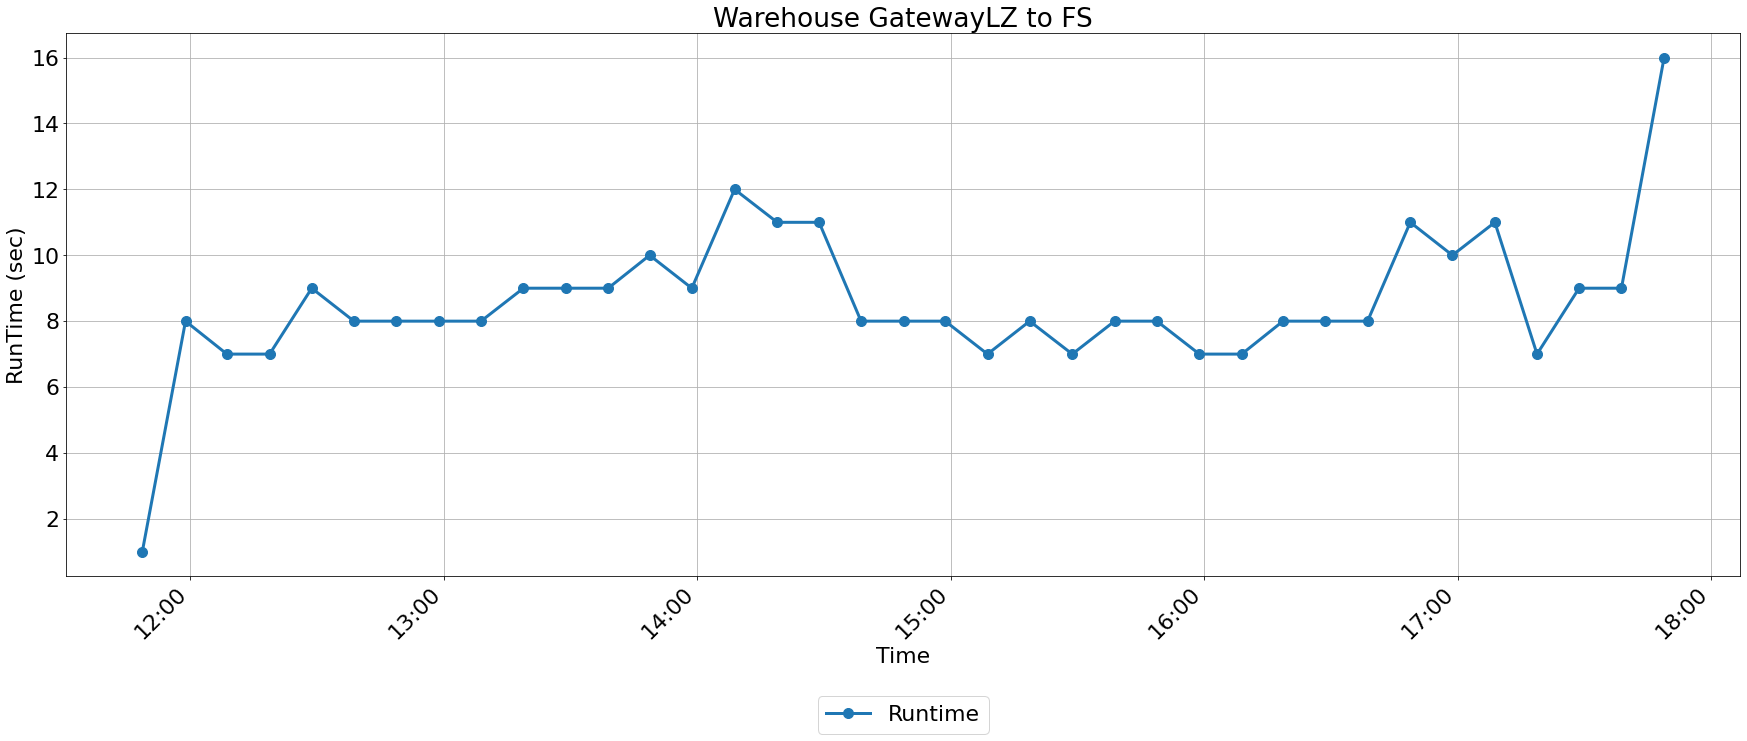

In [22]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(L002_SCH['Time'], L002_SCH['Elapsed'], label='Runtime', lw=3, marker='o', markersize=10)

#ax.plot(L008A['Time'], L008A['Elapsed'], label='Outbound Order Reference', lw=3, marker='o', markersize=10)

ax.set_xlabel('Time')
ax.set_ylabel('RunTime (sec)')
ax.set_title('Warehouse Gateway LZ to FS')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
# Add a legend
ax.legend(
            loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2
        )
plt.grid()
# Rotate and align the x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

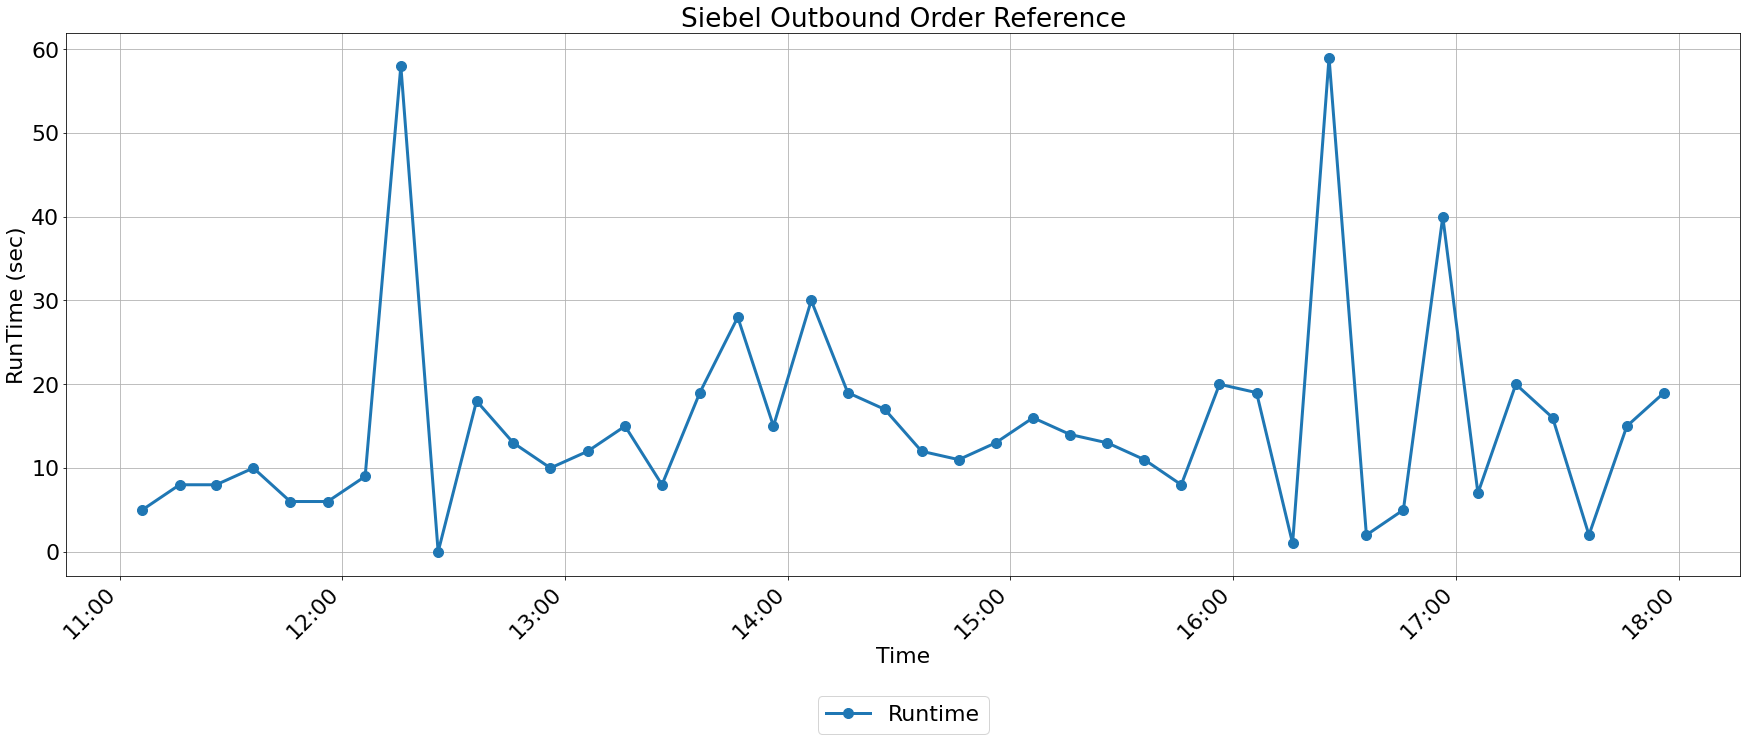

In [23]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(L008A['Time'], L008A['Elapsed'], label='Runtime', lw=3, marker='o', markersize=10)

#ax.plot(L008A['Time'], L008A['Elapsed'], label='Outbound Order Reference', lw=3, marker='o', markersize=10)

ax.set_xlabel('Time')
ax.set_ylabel('RunTime (sec)')
ax.set_title('Siebel Outbound Order Reference')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
# Add a legend
ax.legend(
            loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2
        )
plt.grid()
# Rotate and align the x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [58]:
segments = {}

for i in range(11):
    print('Segment:', i)
    df= tests.get_segments([i])
    total_seconds = (df.results['timeStamp'].max() - df.results['timeStamp'].min())/1000
    result = df.results.groupby('label')['Latency'].agg(['count', 'mean', 'median','min','max', lambda x: x.quantile(0.9), lambda x: x.quantile(0.95), lambda x: x.quantile(0.99),lambda x: x.shape[0] / total_seconds])
    print(result)


Segment: 0
                           mean   median    min    max  <lambda_0>  \
label                                                                
QSL_Base           12397.733333  12239.5  11365  14715     13427.3   
RTSA-EDD_Base       1656.017299   1480.0   1235   7357      2103.6   
RTSA_Details_Base   1653.660013   1476.0   1229   7444      2063.0   
SalesOrder_Base     5683.600000   5263.0   4959  10619      6383.1   
TnT_Base              93.760000     79.0     65    342       120.3   
WG_Base             2636.466667   2505.5   2014   5914      2902.3   

                   <lambda_1>  <lambda_2>  <lambda_3>  
label                                                  
QSL_Base             13680.00    14459.22    0.016655  
RTSA-EDD_Base         2429.80     4404.70    0.834395  
RTSA_Details_Base     2442.70     4614.84    0.834395  
SalesOrder_Base       7742.40    10002.46    0.016655  
TnT_Base               172.45      280.62    0.055515  
WG_Base               2990.80     50

In [60]:
results_list = []

for i in range(11):
    print('Segment:', i)
    df = tests.get_segments([i])
    total_seconds = (df.results['timeStamp'].max() - df.results['timeStamp'].min()) / 1000
    result = df.results.groupby('label')['Latency'].agg(['count','mean', 'median', 'min', 'max', lambda x: x.quantile(0.9), lambda x: x.quantile(0.95), lambda x: x.quantile(0.99), lambda x: x.shape[0] / total_seconds])
    
    # Append the results to the list
    results_list.append(result)

# Concatenate the results from each segment into a single DataFrame
final_result = pd.concat(results_list, keys=range(11), names=['Segment'])

# Save the DataFrame to a CSV file
final_result.to_csv('seg_stats.csv')

Segment: 0
Segment: 1
Segment: 2
Segment: 3
Segment: 4
Segment: 5
Segment: 6
Segment: 7
Segment: 8
Segment: 9
Segment: 10


In [53]:
#result = df.groupby('label').apply(lambda x: x.shape[0] / (x['timeStamp'].max() - x['timeStamp'].min()).total_seconds())
(segments[0].results['timeStamp'].max() - segments[0].results['timeStamp'].min())/1000


1801.306

In [ ]:
not_tnt = 

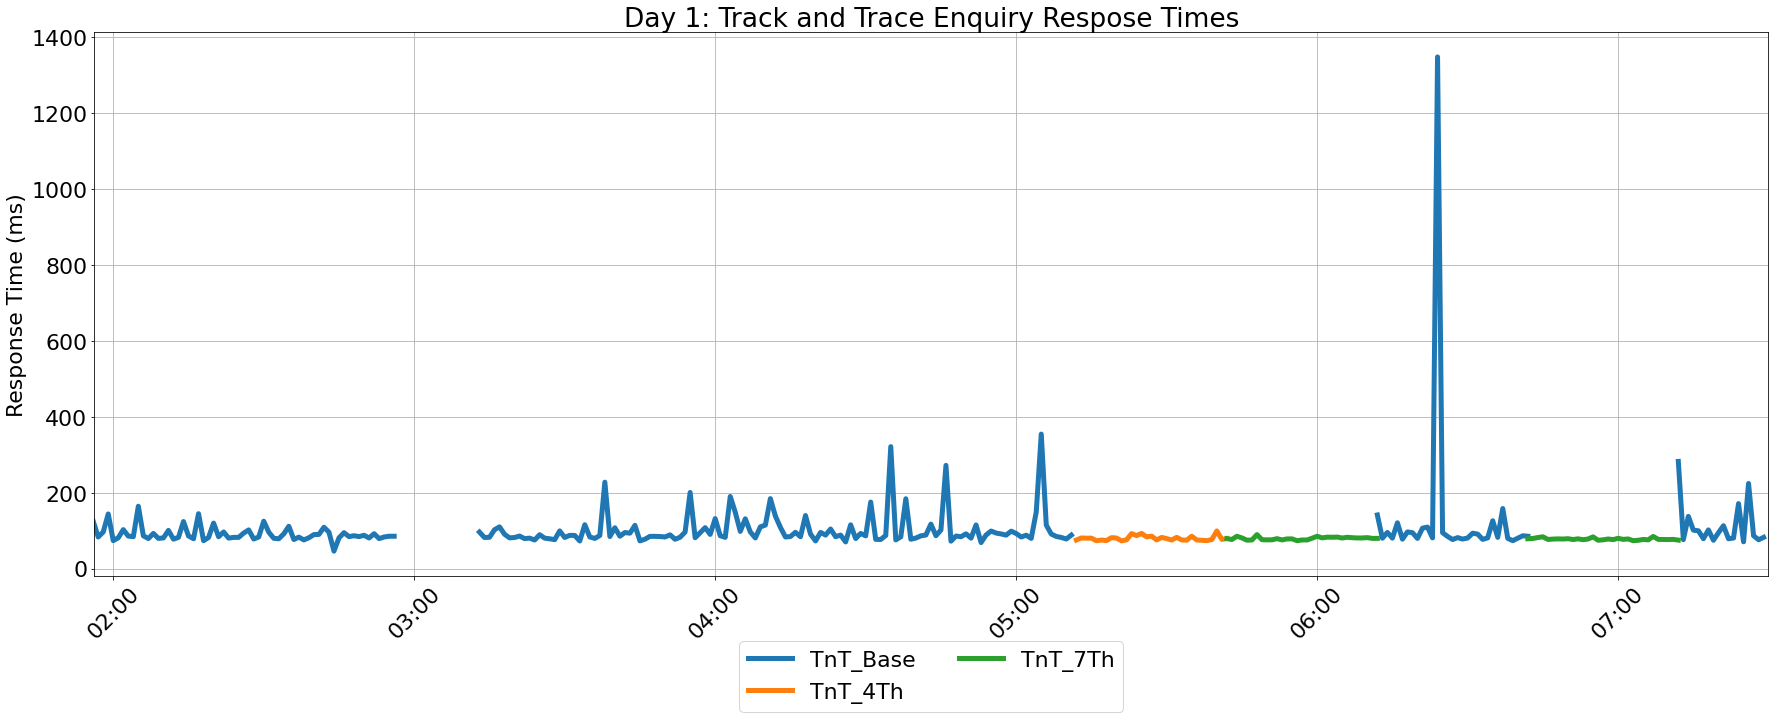

In [63]:
tests.time_series_by_categories(['TnT'], [], "Day 1: Track and Trace Enquiry Respose Times", "avg_res")

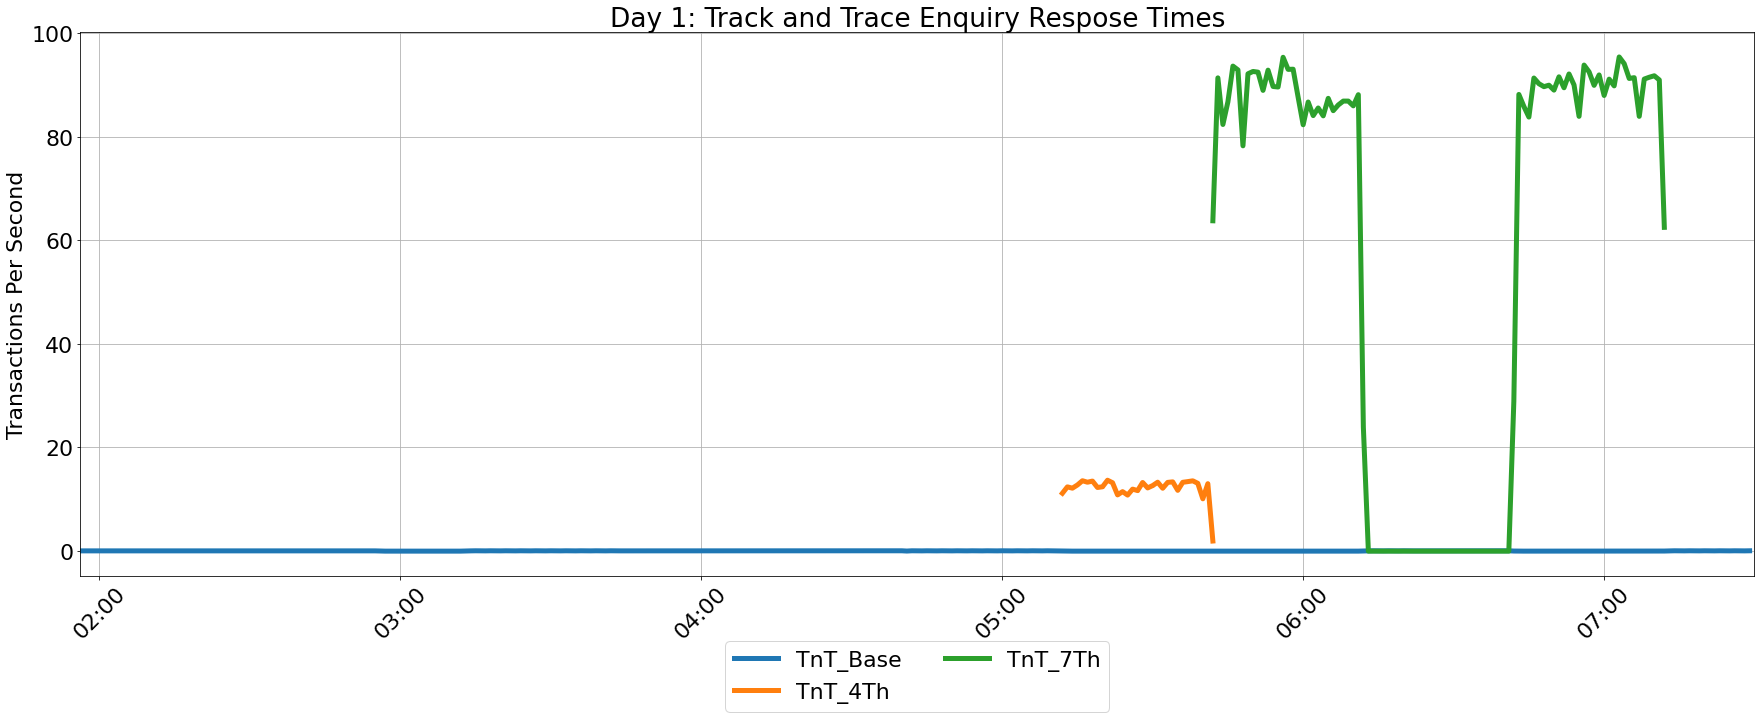

In [65]:
tests.time_series_by_categories(['TnT'], [], "Day 1: Track and Trace Enquiry Respose Times", "txn_per_sec")

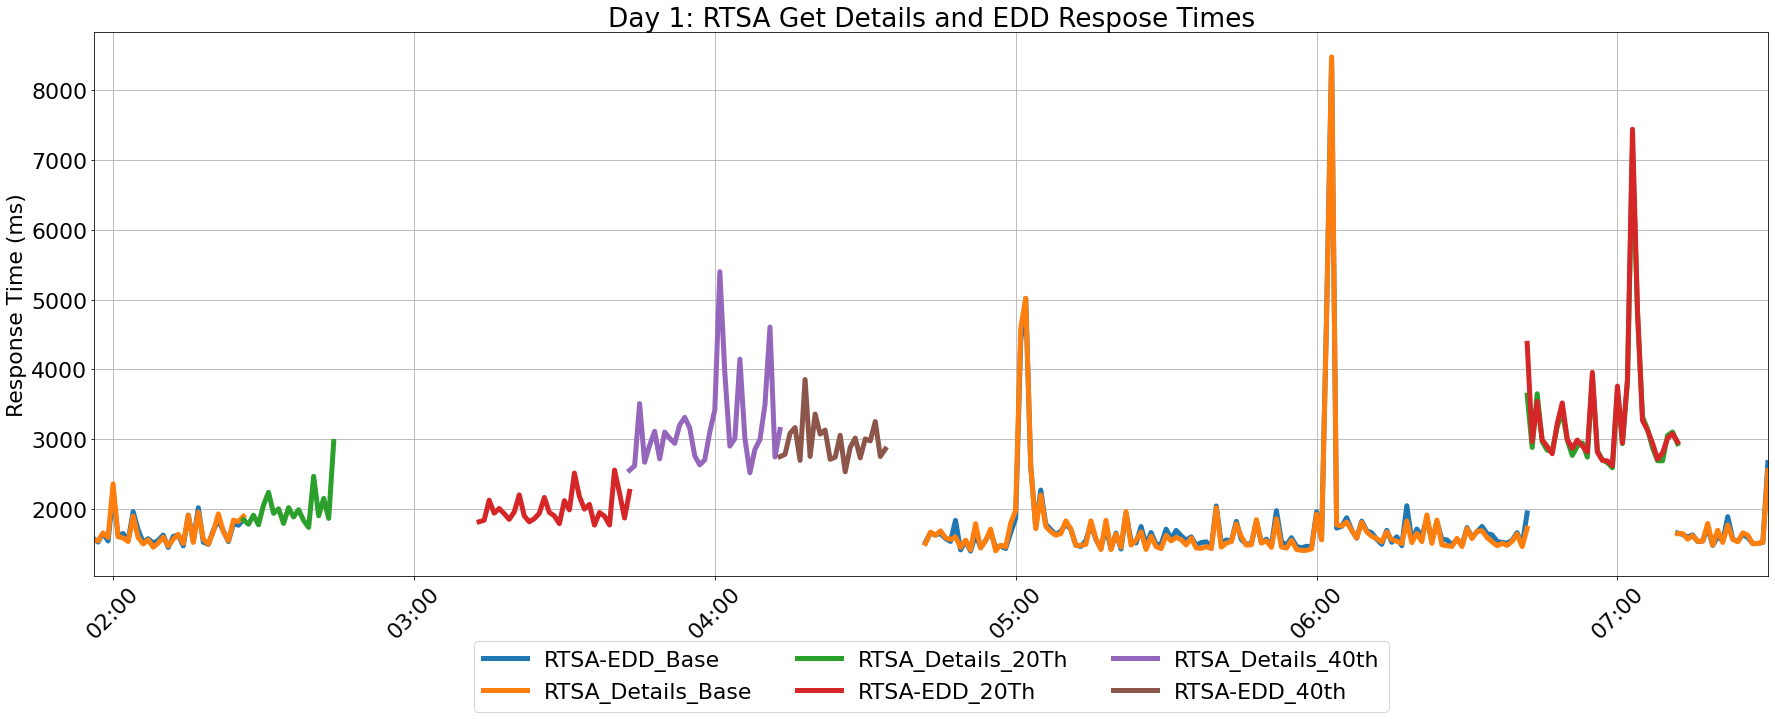

In [7]:
tests.time_series_by_categories(['RTSA', 'RTSA-EDD'], [], "Day 1: RTSA Get Details and EDD Respose Times", "avg_res")

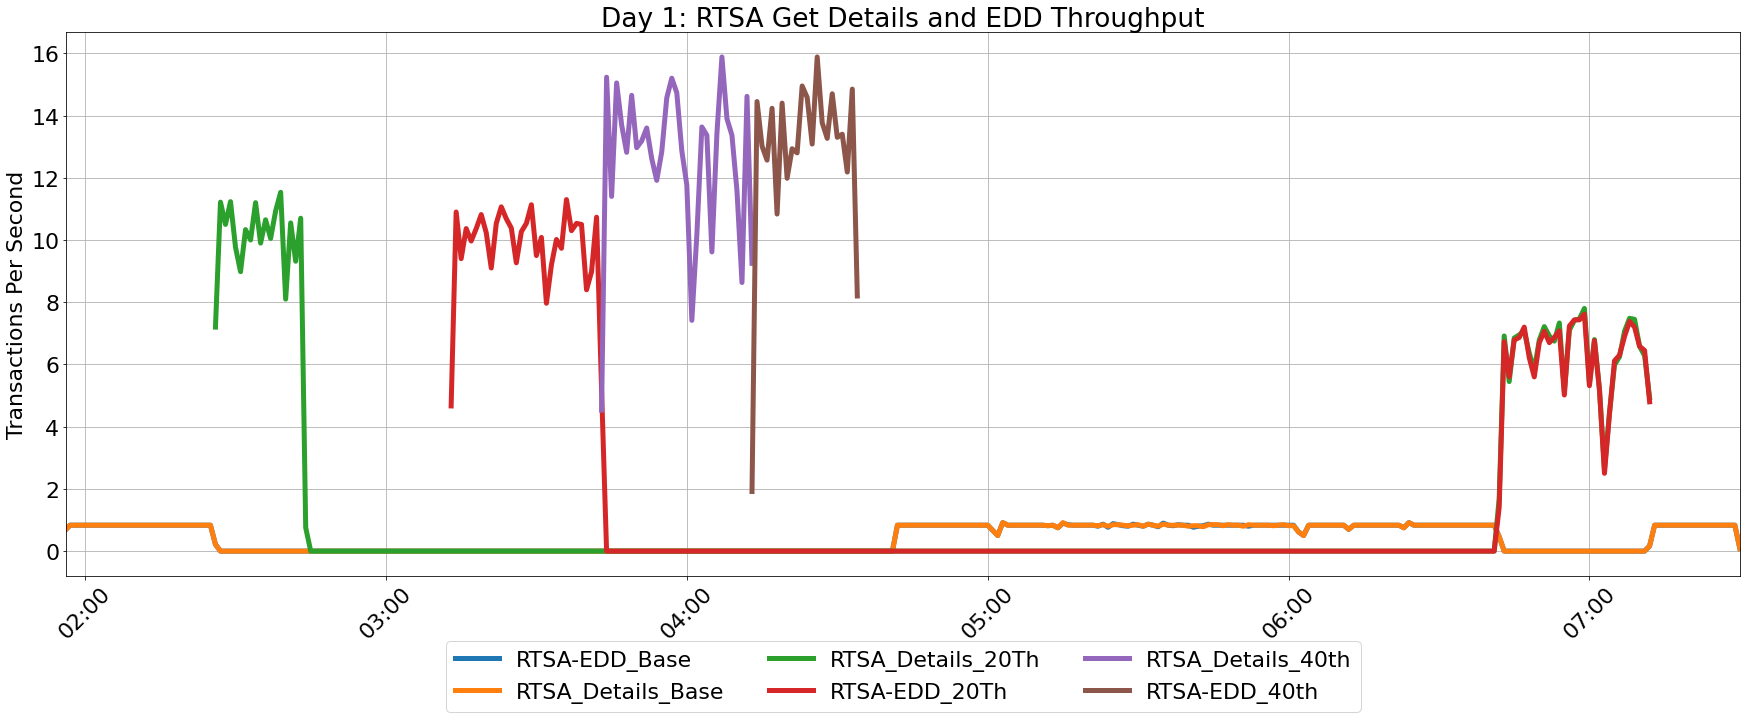

In [6]:
tests.time_series_by_categories(['RTSA', 'RTSA-EDD'], [], "Day 1: RTSA Get Details and EDD Throughput", "txn_per_sec")

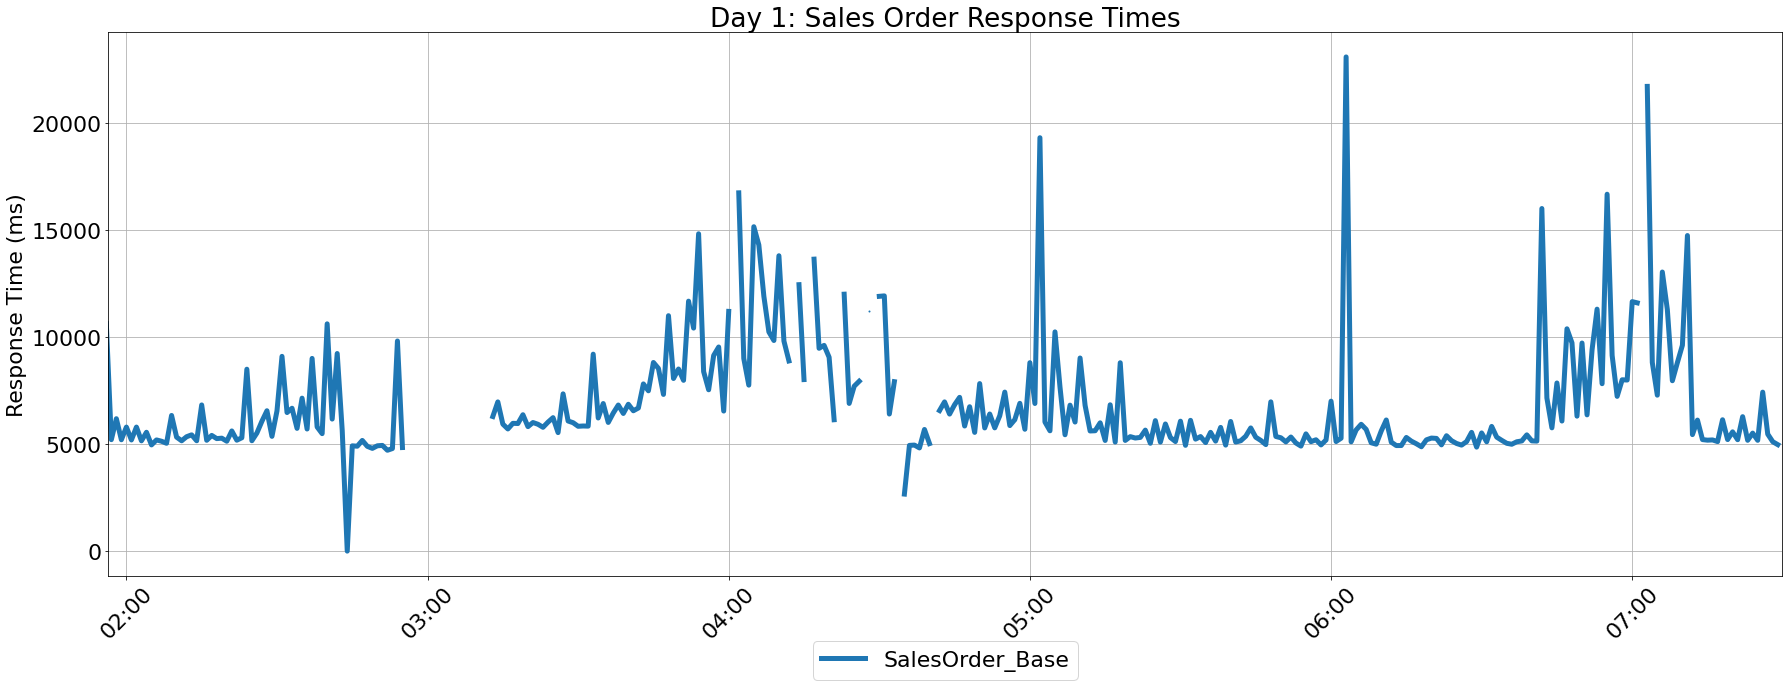

In [8]:
tests.time_series_by_categories(['SalesOrder'], [], "Day 1: Sales Order Response Times", "avg_res")

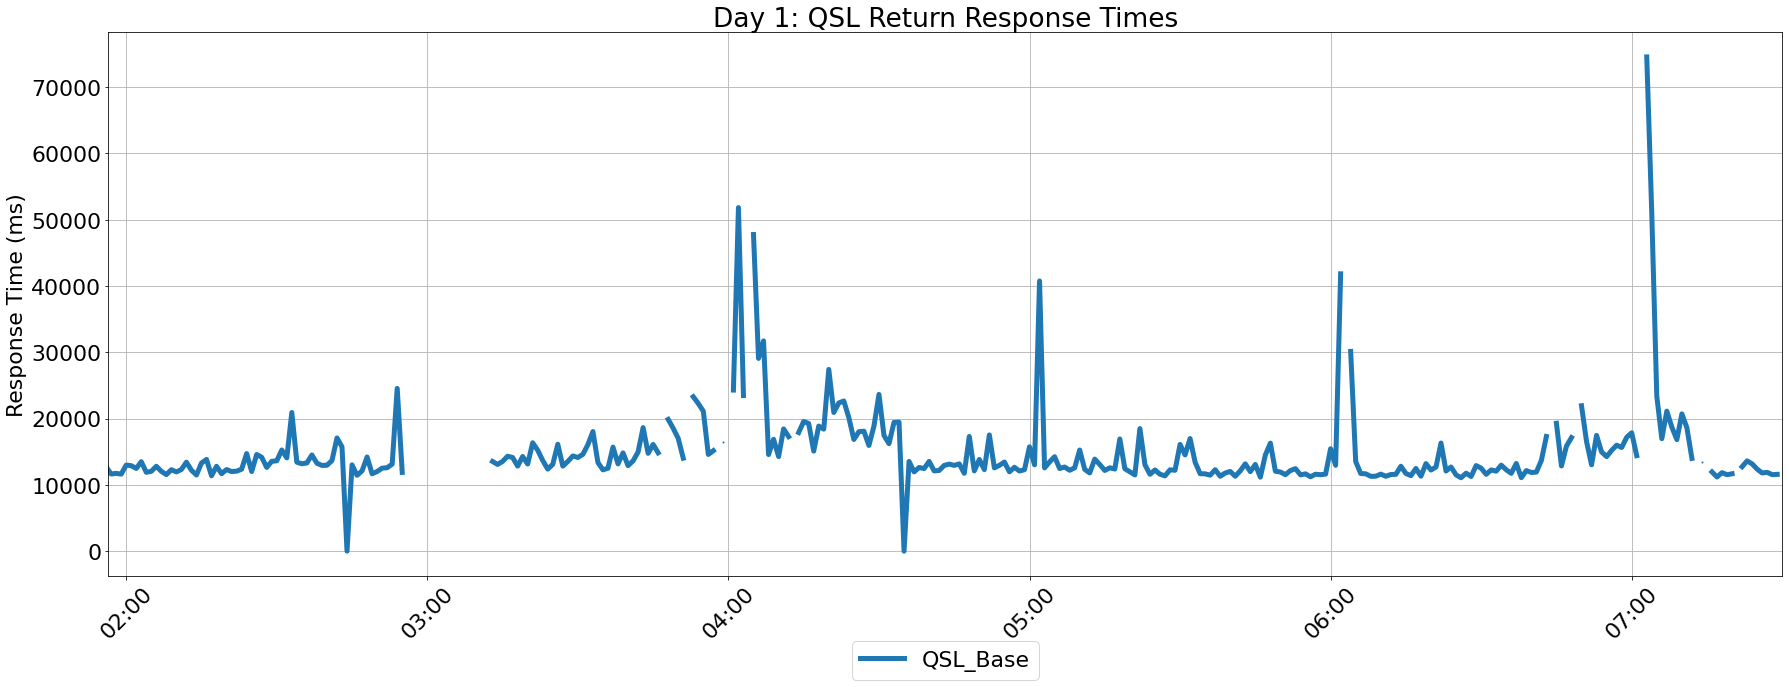

In [9]:
tests.time_series_by_categories(['QSL'], [], "Day 1: QSL Return Response Times", "avg_res")

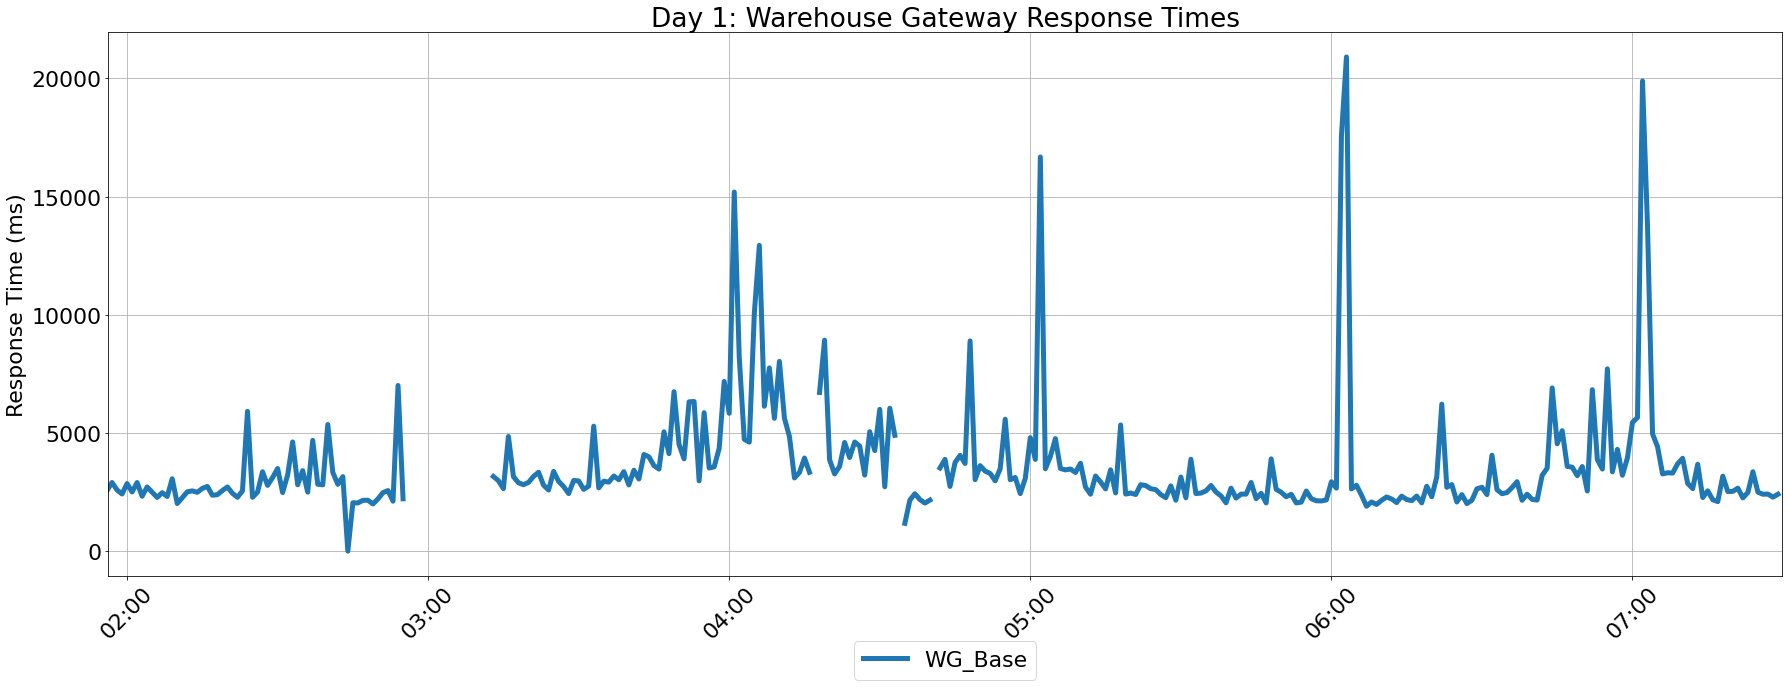

In [11]:
tests.time_series_by_categories(['WG'], [], "Day 1: Warehouse Gateway Response Times", "avg_res")

In [24]:
tnt_out = pd.read_csv("logs\day1_TnT.csv")

In [25]:
tnt_out.head()


,INTERFACE_CODE,INTERFACE_RUN_ID,Start,End,Elapsed
0,TPG-R2-L017.02,3265507,17:55:03,19/JUL/23 05:55:05.000000000 PM,2
1,TPG-R2-L017-OrderEvent,3265534,17:54:02,19/JUL/23 05:54:09.000000000 PM,7
2,TPG-R2-L017.02,3265406,17:45:05,19/JUL/23 05:45:09.000000000 PM,4
3,TPG-R2-L017-OrderEvent,3462502,17:35:16,19/JUL/23 05:35:27.000000000 PM,11
4,TPG-R2-L017-OrderEvent,3462501,17:35:16,19/JUL/23 05:35:27.000000000 PM,11


In [26]:
tnt_out['INTERFACE_CODE'].unique()

array(['TPG-R2-L017.02', 'TPG-R2-L017-OrderEvent', 'TPG-R2-L017.01.SCH'],
      dtype=object)

In [29]:
tnt_out['Time']= pd.to_datetime(tnt_out['End'])
Email= tnt_out[tnt_out["INTERFACE_CODE"]=="TPG-R2-L017.01.SCH"]
Sms = tnt_out[tnt_out["INTERFACE_CODE"]=="TPG-R2-L017.02"]
OrderEvent = tnt_out[tnt_out['INTERFACE_CODE']=="TPG-R2-L017-OrderEvent"]


In [40]:
Email.head(6)

,INTERFACE_CODE,INTERFACE_RUN_ID,Start,End,Elapsed,Time
52,TPG-R2-L017.01.SCH,3418793,17:05:10,19/JUL/23 05:09:01.000000000 PM,51,2023-07-19 17:09:01
109,TPG-R2-L017.01.SCH,3210924,16:05:17,19/JUL/23 04:08:16.000000000 PM,59,2023-07-19 16:08:16
185,TPG-R2-L017.01.SCH,3171135,15:05:05,19/JUL/23 03:07:32.000000000 PM,27,2023-07-19 15:07:32
264,TPG-R2-L017.01.SCH,3116035,14:05:08,19/JUL/23 02:06:58.000000000 PM,50,2023-07-19 14:06:58
349,TPG-R2-L017.01.SCH,3095806,13:05:09,19/JUL/23 01:06:23.000000000 PM,14,2023-07-19 13:06:23
446,TPG-R2-L017.01.SCH,3094283,12:05:16,19/JUL/23 12:05:47.000000000 PM,31,2023-07-19 12:05:47


In [32]:
OrderEvent.shape

(412, 6)

In [37]:
orderhub = tnt_out = pd.read_csv("logs\day1_orderhub.csv")
orderhub["INTERFACE_CODE"].unique()
orderhub['Time']= pd.to_datetime(orderhub['End'])
#orderhub.hea

In [38]:
L050 = orderhub[orderhub['INTERFACE_CODE']=='TPG-R2-L050']
L098 = orderhub[orderhub['INTERFACE_CODE']=='TPG-R2-L098']
L097 = orderhub[orderhub['INTERFACE_CODE']=='TPG-R2-L097']



In [44]:
L097.shape

(42, 6)